In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

In [ ]:
! unzip challenges-in-representation-learning-facial-expression-recognition-challenge

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import keras.preprocessing
import matplotlib.pyplot as plt

In [ ]:
FER13_data = pd.read_csv('icml_face_data.csv')

 returning a random image from dataset for each class 


In [ ]:
def toImage(data, image_class):
  class_data = data[data.emotion == image_class]
  random_row = class_data.sample()
  sample_img = np.fromstring(random_row[' pixels'].iloc[0], dtype = int, sep=' ').reshape(48,48) # images are 48 * 48
  return sample_img

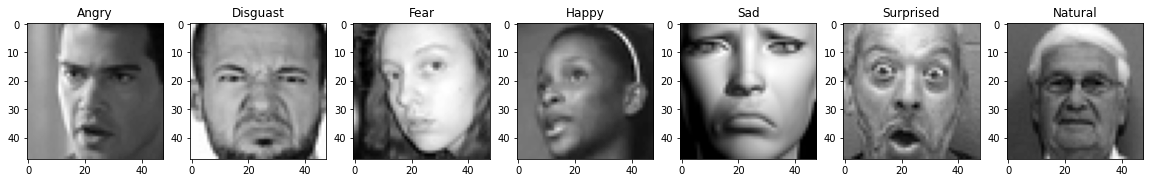

In [ ]:
# now we plot a random image of each class in dataset 
facial_expressions = ["Angry", "Disguast", "Fear", "Happy", "Sad", "Surprised", "Natural"]
plt.figure(figsize = (20, 5))
for counter in range(7):
  img = toImage(FER13_data, counter)
  ax = plt.subplot(1, 7, counter+1)
  ax.set_title(facial_expressions[counter])
  plt.imshow(img, cmap = 'gray')

In [ ]:
# lets take a look at our dataset 
FER13_data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
# lets see if we have nan values in our dataset
FER13_data.isna().sum()

emotion    0
 Usage     0
 pixels    0
dtype: int64

In [ ]:
# lets seperate test and train datas
Train_data = FER13_data.loc[FER13_data[' Usage'] == 'Training']
Test_data = FER13_data.loc[FER13_data[' Usage'] == 'PublicTest']
print("Number of training images:", Train_data[' Usage'].count())
print("Number of test images:", Test_data[' pixels'].count())

Number of training images: 28709
Number of test images: 3589


In [ ]:
def preprocess(data):
  n = data.shape[0] # number of rows in df 
  images = np.zeros((n, 48, 48, 1)) # this array hold all the images
  #labels = np.zeros((1,35887)
  for i, row in enumerate(data.index):
    pixels = data.loc[row, ' pixels']
    images[i] = np.fromstring(pixels, dtype=float, sep=' ').reshape(48, 48, 1)

  images = images/255 #normalizing pixels
  temp_labels = data['emotion'].to_numpy().astype('float64')
  labels = tf.keras.utils.to_categorical(temp_labels, 7, dtype ='float64')
  return images, labels

In [ ]:
train_images, train_labels = preprocess(Train_data)
test_images, test_labels = preprocess(Test_data)
print(np.shape(train_labels))

(28709, 7)


### **CNN architecture**
### 1) conv layers
### 2) pooling layers
### 3) FC layers

In [ ]:
def cnn_better_model():

  model= models.Sequential()
  # 1st block
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))
  # 2nd block
  model.add(layers.Conv2D(64,(3,3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))
  # 3rd block
  model.add(layers.Conv2D(128,(3,3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))
  # 4th block
  model.add(layers.Conv2D(256,(3,3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))
  #Faltten the model
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(7, activation='softmax'))
  model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
  return model

### **Model training**

In [ ]:
model2 = cnn_better_model()
model2.compile(
    loss='categorical_crossentropy', # cross entropy loss function
    metrics=['accuracy']
)
history2 = model2.fit(
                    x = train_images,
                    y = train_labels,
                    validation_data = (test_images, test_labels),
                    epochs=20,
                    batch_size=64)

Epoch 1/20
449/449 [==============================] - 185s 403ms/step - loss: 1.6783 - accuracy: 0.3359 - val_loss: 2.0518 - val_accuracy: 0.2736
Epoch 2/20
449/449 [==============================] - 166s 369ms/step - loss: 1.4236 - accuracy: 0.4561 - val_loss: 1.3640 - val_accuracy: 0.4837
Epoch 3/20
449/449 [==============================] - 170s 379ms/step - loss: 1.3301 - accuracy: 0.5013 - val_loss: 1.4643 - val_accuracy: 0.4544
Epoch 4/20
449/449 [==============================] - 167s 372ms/step - loss: 1.2721 - accuracy: 0.5207 - val_loss: 1.1858 - val_accuracy: 0.5508
Epoch 5/20
449/449 [==============================] - 164s 366ms/step - loss: 1.2278 - accuracy: 0.5369 - val_loss: 1.3351 - val_accuracy: 0.4940
Epoch 6/20
449/449 [==============================] - 165s 368ms/step - loss: 1.2038 - accuracy: 0.5501 - val_loss: 1.2289 - val_accuracy: 0.5302
Epoch 7/20
449/449 [==============================] - 166s 369ms/step - loss: 1.1769 - accuracy: 0.5636 - val_loss: 1.1340 -

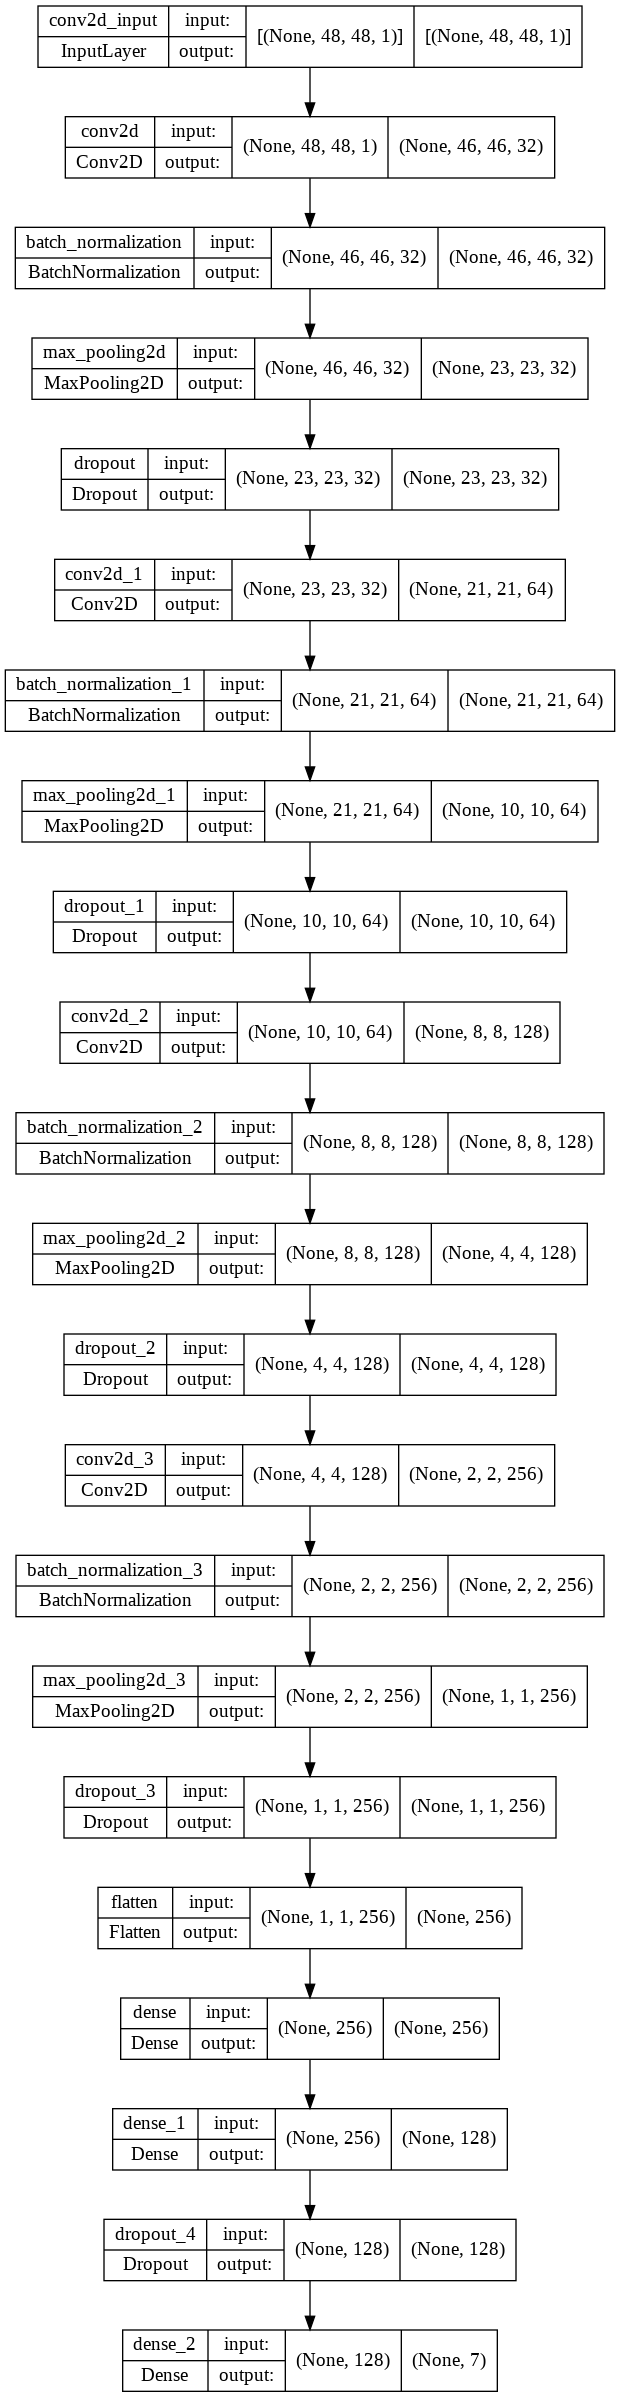

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### ***Model evaluation***

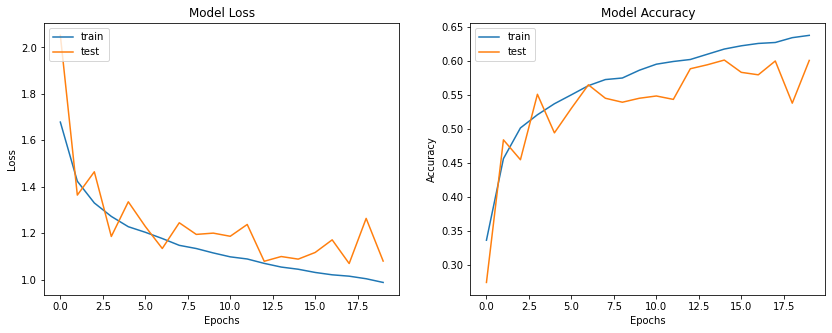

In [ ]:
# Plotting the loss & accuracy
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
private_test_data = FER13_data.loc[FER13_data[' Usage'] == 'PrivateTest']
private_test_images , private_test_labels = preprocess(private_test_data)
scores = model2.evaluate(private_test_images, private_test_labels, verbose=0)
print('accuracy for private test data: %f', scores[1]*100)

accuracy for private test data: %f 59.82167720794678


In [ ]:
scores = model2.evaluate(test_images, test_labels, verbose=0)
print('accuracy for public test data: %f', scores[1]*100)

accuracy for public test data: %f 60.0724458694458
